In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In this notebook we will delineate the procedure to analyze ATP hydrolysis experiments. We will start by calculating the line equation to transform absorbance to phosphate moles, and then we will calculate the initial velocity of the reaction. Finally, we will calculate the Michaelis-Menten constant and the maximum velocity of the reaction.

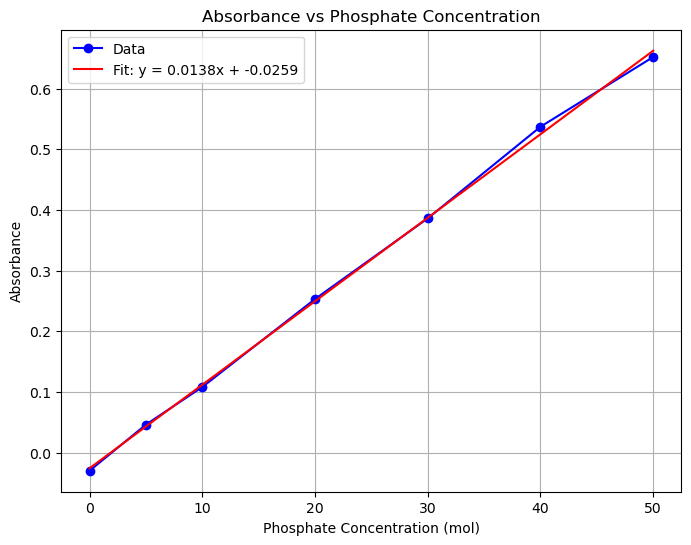

The equation of the line is: Absorbance = 0.0138(Phosphate) + -0.0259


In [2]:
# Sample DataFrame
data = {
    'phosphate mol': ['blank', 0, 5, 10, 20, 30, 40, 50],
    'absorbance': [0.880, 0.850, 0.926, 0.988, 1.133, 1.266, 1.417, 1.532]
}

df = pd.DataFrame(data)

# Convert 'phosphate mol' to numeric, setting errors='coerce' to handle 'blank'
df['phosphate mol'] = pd.to_numeric(df['phosphate mol'], errors='coerce')

# Get the absorbance value of the first row (blank)
blank_value = df.loc[0, 'absorbance']

# Subtract the blank value from all absorbance values
df['absorbance'] = df['absorbance'] - blank_value

# Remove the first row
df = df.drop(0)

# Perform linear regression
x = df['phosphate mol'].values
y = df['absorbance'].values
slope, intercept = np.polyfit(x, y, 1)  # Linear regression (degree 1)

# Plot absorbance vs phosphate concentration
plt.figure(figsize=(8, 6))
plt.plot(df['phosphate mol'], df['absorbance'], marker='o', linestyle='-', color='b', label='Data')

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', label=f'Fit: y = {slope:.4f}x + {intercept:.4f}')

# Add titles and labels
plt.title('Absorbance vs Phosphate Concentration')
plt.xlabel('Phosphate Concentration (mol)')
plt.ylabel('Absorbance')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
 
# Print the equation of the line
print(f'The equation of the line is: Absorbance = {slope:.4f}(Phosphate) + {intercept:.4f}')


In [3]:
K401_2ruta = "./data/k401hydrolisis2.xlsx"

K401_2df = pd.read_excel(K401_2ruta, skiprows=36).iloc[:21, 3:11]
K401_2df.reset_index(drop=False, inplace=True)

K401_2df = K401_2df.rename(columns={"index": "Time (min)", })

# use slope and intercept to calculate the concentration of phosphate for each column
for column in K401_2df.columns[1:]:
    K401_2df[column] = (K401_2df[column] - intercept) / slope

# for each column subtract the first value of the column from the rest of the values
for column in K401_2df.columns[1:]:
    K401_2df[column] = K401_2df[column] - K401_2df[column][0]

# rename columns starting from A7 which is 200 nmol, B7 is 100 nmol, C7 is 50 nmol, D7 is 25 nmol, E7 is 12.5 nmol, F7 is 6.25 nmol, G7 is 3.125 nmol, H7 is 1.5625 nmol
K401_2df.columns = ["Time (min)", "200 nmol ATP", "100 nmol ATP", "50 nmol ATP", "25 nmol ATP", "12.5 nmol ATP", "6.25 nmol ATP", "3.125 nmol ATP", "1.5625 nmol ATP"]


# save dataframes to excel
K401_2df.to_excel("./data/K401_2df.xlsx", index=False)

K401_2df

,Time (min),200 nmol ATP,100 nmol ATP,50 nmol ATP,25 nmol ATP,12.5 nmol ATP,6.25 nmol ATP,3.125 nmol ATP,1.5625 nmol ATP
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1,9.662534,10.243739,8.936028,8.064220,4.649640,-0.145301,-0.290603,-0.217952
2,2,17.726754,18.525911,15.910488,13.440367,6.393256,-0.290603,-0.217952,-0.363253
3,3,23.974709,24.701215,21.213985,17.072899,6.974461,-0.290603,-0.217952,-0.363253
4,4,28.769650,29.278205,24.701215,19.034466,7.047111,-0.363253,-0.290603,-0.508554
5,5,32.256881,32.547483,27.461939,20.196876,7.047111,-0.363253,-0.363253,-0.508554
6,6,34.799653,35.017605,29.205554,20.778081,7.119762,-0.435904,-0.508554,-0.653856
7,7,36.761220,36.906521,30.585916,21.141334,7.265063,-0.363253,-0.508554,-0.653856
8,8,38.141582,38.214233,31.457724,21.213985,7.192413,-0.508554,-0.581205,-0.653856
9,9,39.231341,39.231341,32.329531,21.213985,7.192413,-0.508554,-0.653856,-0.653856


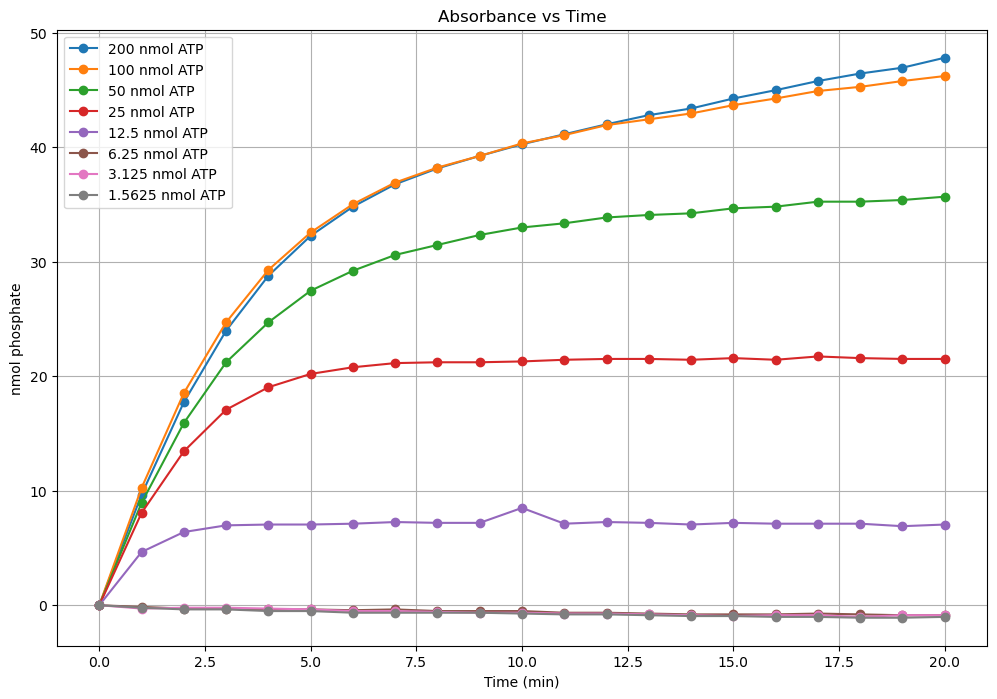

In [4]:
# plot the data
plt.figure(figsize=(12, 8))

for col in K401_2df.columns[1:]:
    plt.plot(K401_2df["Time (min)"], K401_2df[col], marker='o', linestyle='-', label=col)

plt.title('Absorbance vs Time')
plt.xlabel('Time (min)')
plt.ylabel('nmol phosphate')

plt.legend()
plt.grid(True)
plt.show()

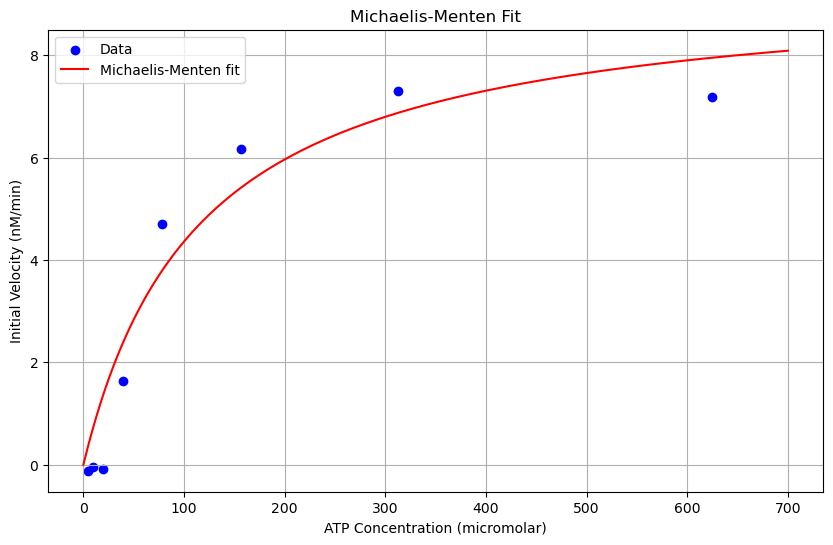

(9.430225369691652, 116.26779172797997)

In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# # Load the Excel file
# file_path = './data/K401_2df.xlsx'
# data = pd.read_excel(file_path)

# Ensure all values are numeric
K401_2df = K401_2df.apply(pd.to_numeric, errors='coerce')

# Extract time and ATP concentration columns
time = K401_2df['Time (min)']
atp_concentrations = K401_2df.columns[1:]

# Calculate initial velocities (slopes at the first few time points)
initial_velocities = []

for column in atp_concentrations:
    # Use np.polyfit to get the slope of the initial points (first 5 points)
    slope = np.polyfit(time[:5], K401_2df[column][:5], 1)[0]
    initial_velocities.append(slope)

initial_velocities = np.array(initial_velocities)

# Convert ATP concentrations to micromolar
atp_conc_micromolar = np.array([625, 312.5, 156.25, 78.125, 39.0625, 19.53125, 9.765625, 4.8828125])

# Michaelis-Menten equation
def michaelis_menten(s, vmax, km):
    return (vmax * s) / (km + s)

# Fit the data to the Michaelis-Menten equation
params, covariance = curve_fit(michaelis_menten, atp_conc_micromolar, initial_velocities, bounds=(0, [np.inf, np.inf]))
vmax, km = params

# Generate data for the fitted curve
s_fit = np.linspace(0, 700, 500)
v_fit = michaelis_menten(s_fit, vmax, km)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(atp_conc_micromolar, initial_velocities, label='Data', color='blue')
plt.plot(s_fit, v_fit, label='Michaelis-Menten fit', color='red')
plt.xlabel('ATP Concentration (micromolar)')
plt.ylabel('Initial Velocity (nM/min)')
plt.title('Michaelis-Menten Fit')
plt.legend()
plt.grid(True)
plt.show()

vmax, km

In [6]:
vmax

9.430225369691652